# Yelp Business Rating Prediction

## Introduction

This is the first assignment in Data School's _Machine Learning with Text_ course. Some of the code snippets will be a result from the lessons in the Week 1 materials but as much as possible has been added to create original work. Each step was represented in the assignment as a question. These questions have been removed to provide a flow in analysis.

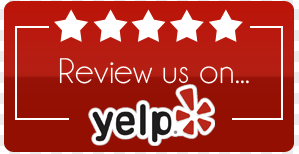

In [13]:
from IPython.display import Image
Image("assignments/images/yelp_reviews.png")
# source: https://www.google.com/search?rlz=1C5CHFA_enUS773US773&biw=960&bih=930&tbm=isch&sa=1&ei=WLB3WsKKHsfa5gKe6ISQDQ&q=yelp+reviews&oq=yelp+reviews&gs_l=psy-ab.3..0l5j0i5i30k1l5.25061.26314.0.26400.12.9.0.3.3.0.101.748.8j1.9.0....0...1c.1.64.psy-ab..0.12.795...0i67k1.0.i5VaSDKx-Zc#imgrc=kVO7m-ZRlJ5ZBM:

**Data**

The data is derived from a 2013 kaggle competition and can be found here:
https://www.kaggle.com/c/yelp-recsys-2013. The Yelp dataset consists of text reviews for restaurants with corresponding star ratings between 1 to 5. 

**Goal**

The goal of this analysis is to predict the star rating based on the text from the reviews. 

## Step 1: Load data

The analysis begins with importing the necessary dependencies from the machine learning library _sklearn_, including setting the directory to a cloud-based storage system in Microsoft OneDrive. 

In [1]:
# import modules
import pandas as pd
import sklearn

# set directory to data folder
import os
os.chdir('/Users/nicholasbeaudoin/Desktop/OneDrive/Data School/ML_Text/MLtext2-master')

# import data
yelp = pd.read_csv('data/yelp.csv')

# display data
yelp.shape

/Users/nicholasbeaudoin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(10000, 10)

## Step 2: Data overview

The next step is to get a good idea of the data. We will look at the shape and columns to get a sense of what needs to be done to get the data in the format needed for textual machine learning.

In [2]:
# data shape
yelp.shape

(10000, 10)

In [3]:
# data clumns
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [22]:
# first 5 observations
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## Step 3: Look at 5 and 1 star ratings

In [4]:
# create dataframe of sonly 5 and 1 star ratings
yelp_stars = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

# check work
yelp_stars.stars.value_counts().sort_index()

1     749
5    3337
Name: stars, dtype: int64

## Step 4: Data prep for machine learning

The first part of the machine learning process is to split our data into testing and training sets. By doing this, we are able to perform model parameter fitting on the test set and use the chosen algorithm on the testing set. An accuracy score can then be used to determine the percentage of accurately predicted reviews. We will set the random state to 1 to ensure future iterations are repeatable and have the same results. The following function function from _sklean_ splits 75% of the data into training and 25% into testing sets.

**Process**

- Define X matrix and y vector
- Split into testing and training
- Confirm data split

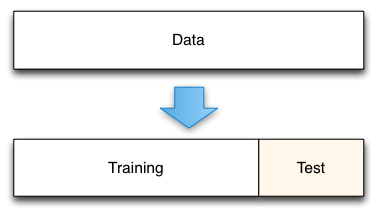

In [15]:
Image("assignments/images/train_test_split.png")
# source: https://www.google.com/search?rlz=1C5CHFA_enUS773US773&biw=960&bih=930&tbm=isch&sa=1&ei=c7B3WqvMMYzl5gLZgKjABg&q=machine+learning+test+train+split&oq=machine+learning+test+train+split&gs_l=psy-ab.3...140902.144892.0.144947.33.22.0.6.6.0.145.1926.14j7.21.0....0...1c.1.64.psy-ab..6.20.1447...0j0i67k1j0i24k1.0.gNWsb0a3M_8#imgdii=KiddXgN1d6cCqM:&imgrc=ni4mPEWJG33n5M:

In [5]:
# define X and y
X = yelp.text
y = yelp.stars

In [20]:
# import train_test_split
from sklearn.cross_validation import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# inspect the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500,)
(2500,)
(7500,)
(2500,)


## Step 5: Vectorization Process

Now that the data is split into testing and training sets, we need transform the text into a useable format for the machine learning algorithm. Using a vectoization method called CountVectorizer, we can tranform the training data into a document-term matrix which will allow us to use numerical algorithms on the text data. The resulting document-term matrix will have each word as a seperate column with each review (document) as a seperate row-level observation. 

**CountVectorizer** 
 - Ignores case by making lowercase
 - Puts in unicode
 - Ingores punctuation
 - Default token pattern = (?u)\\b\\w\\w+\\b' (Drop words not at least 2 characters)

**Document-term Matrix**

The DTM is a set of columns that represent each word in the corpus and the rows represent each document. In the case of the SMS messages, a document refers to a single SMS. In the example image below, this representation has been inverted and the columns represent the documents while the rows represent the individual words.

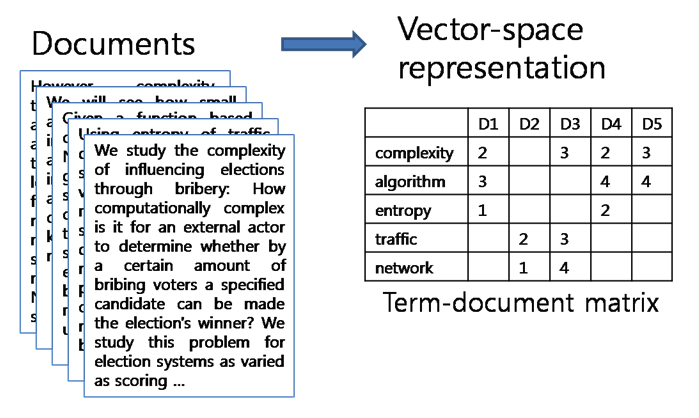

In [12]:
Image("assignments/images/document_term_matrix.png")
# image source: https://www.google.com/search?q=document+term+matrix&rlz=1C5CHFA_enUS773US773&source=lnms&tbm=isch&sa=X&ved=0ahUKEwi36-bzzI3ZAhULmlkKHZpMDYIQ_AUICigB&biw=960&bih=930#imgrc=rxrW7T6zcAQ2QM:


**Sparse vs. Dense Matrix**

The matrix will be a sparse matrix, which is a more compact version of the original matrix Python uses. Instead of listing zeros for row-level observations that don't have the corresponding word, the matrix will be stored in tuples to indicate the location of the word in the dense matrix. The dense matrix stores all elements, while the sparse matrix stores only non-zero elements. 

Originally there are 622,700 words in the yelp review dataset which have all been converted using the CountVectorizer method. The sparse matrix only has 25,797 words to keep track of. Computationally, this saves a good deal of time when performing machine learning algorithms.

**Process**
- Import
- Instantiate 
- Tranform to DTM

In [26]:
# Import class
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# instantiate 
vect = CountVectorizer()

In [28]:
# transform training data into a document-term matrix
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(7500, 25797)

In [29]:
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(2500, 25797)

In [30]:
# look at size of training sparse vs. dense matrix
X_train_dtm

<7500x25797 sparse matrix of type '<class 'numpy.int64'>'
	with 622700 stored elements in Compressed Sparse Row format>

## Step 5: Apply algorithm

In the following code, we will apply Multinomial Naive Bayes to predict the star rating with text as the input. The following process is the **I-I-F-P** process of machine learning below.

**Process**
1. Import
2. Instantiate
3. Fit
4. Predict

In [31]:
# import from sklearn
from sklearn.naive_bayes import MultinomialNB

# instantiate Naive Bayes
nb = MultinomialNB()

In [32]:
# train the model using X_train_dtm 
%time nb.fit(X_train_dtm, y_train)

CPU times: user 15.8 ms, sys: 5.42 ms, total: 21.2 ms
Wall time: 19.4 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [34]:
# import sklearn metrics
from sklearn import metrics

# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.47120000000000001

In [35]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]])